# Reduced Order Model using Gaussian Process Regression

## Mathematical theory

The objective of the ROM is to predict the entire state of the system in the unexplored parts of the design space. It is possible to achieve this result by pairing dimensionality reduction via POD with the regression performed using GPR. 


The POD (also known as Principal Component Analysis) is a decomposition technique in which the data matrix $\mathbf{X} \subset \mathbb{R}^{n,p}$ is decomposed into a matrix $\mathbf{U} \subset \mathbb{R}^{n,p}$ and a matrix $\mathbf{A} \subset \mathbb{R}^{p,p}$:


\begin{equation}
\mathbf{X} = \mathbf{U} \mathbf{A}^T
\end{equation}


The data matrix is formed by arranging $p$ vectors of dimension $n$ as column vectors. The matrices $\mathbf{U}$ and $\mathbf{A}$ are orthogonal matrices which form a basis for the span of the columns and rows of $\mathbf{X}$, respectively.  The POD is employed for dimensionality reduction because the $q$-order truncation of the new basis is the one that minimizes the $l_2$ norm reconstruction error. This means that the matrix $\mathbf{X}$ can be approximated as:


\begin{equation}
\mathbf{X} \approx \mathbf{U}_q \mathbf{A}_q^T
\end{equation}

where $\mathbf{U}_q \subset \mathbb{R}^{n,q}$ and $\mathbf{A}_q \subset \mathbb{R}^{p,q}$ represent the $q$-order truncation of matrices $\mathbf{U}$ and $\mathbf{A}$. 


The matrix $\mathbf{X}$ is built by collecting the results obtained by sampling the design space. The choice of the $p$ combinations of design parameters can be determined through a Design Of Experiments (DOE). 

Each vector $\mathbf{x}$ can be reconstructed using its low-dimensional projection:


\begin{equation}
\mathbf{x}(\boldsymbol{\theta}) = \mathbf{U}_q \mathbf{a}_q(\mathbf{\boldsymbol{\theta}})
\end{equation}

The matrix $\mathbf{U}_q$ encodes the physical information of the system in $q$ vectors (modes), while the vector $\mathbf{a}_q$ contains the $q$ weights for each value of $\boldsymbol{\theta}$ such that:


\begin{equation}
\mathbf{x}(\boldsymbol{\theta}) = \sum_{i=1}^q a_{q,i}(\boldsymbol{\theta}) \boldsymbol{u}_{q,i}
\end{equation}

This framework is particularly useful in the context of regression, because it allows to regress $p$ $q$-dimensional vectors instead of $p$ $n$-dimensional vectors, where $q \ll n$. 


The prediction the solution in the unexplored region of the design space is carried out using a GPR model. In general, the regression problem can be formulated as:
\begin{equation}
y = f(x) + \epsilon
\end{equation}

where $y$ is the observed value, $f(x)$ is the underling function we are trying to model,  $x$ is the independent variable and $\epsilon \sim \mathcal{N}(0, \sigma_n^2)$ represents the noise, modeled as an independent, identically distributed (i.i.d.) Gaussian distribution. In the GPR framework, $f(x)$ is a sample from a Gaussian Process (GP), which is defined as a Gaussian distribution over functions [1](https://doi.org/10.5555/1162254):


\begin{equation}
f(x) \sim GP(m(x), k(x, x'))
\end{equation}

A GP is completely determined by its mean function $m(x)$ and its covariance function $k(x,x')$. This framing is equivalent to say that the data can be represented as a sample from a multivariate Gaussian distribution, known as the prior distribution:

\begin{equation}
\begin{bmatrix}
\mathbf{y} \\
\mathbf{f}_{*}
\end{bmatrix} 
\sim \mathcal{N} \left( \mathbf{0}, 
\begin{bmatrix}
\mathbf{K(\mathbf{X},\mathbf{X})} + \sigma_n^2 \mathbf{I} & \mathbf{K}(\mathbf{X}, \mathbf{X}_{*})\\
\mathbf{K}(\mathbf{X}_{*},\mathbf{X}) & \mathbf{K}(\mathbf{X}_{*}, \mathbf{X}_{*})
\end{bmatrix}
\right)
\end{equation}

where $\mathbf{y}$ represents the target value of the data to regress, $\mathbf{f}_{*} = f(\mathbf{X}_{*})$ is the prediction in the unknown region $\mathbf{X}_{*}$. The matrix $\mathbf{K}$ is computed by applying the kernel function on the training data $\mathbf{X}$ and the prediction data $\mathbf{X}_{*}$. 


The prior and the likelihood of the model are both assumed to be Gaussian distributions. The likelihood express the probability of seeing the data $\mathbf{y}$ given our choice of the model. The posterior distribution can be calculated by applying Bayes' theorem:

\begin{equation}
p(\mathbf{f}| \mathbf{y}, \mathbf{X}) = \frac{p(\mathbf{y}| \mathbf{f}, \mathbf{X})  \ p(\mathbf{f}| \mathbf{X})}{p(\mathbf{y}|\mathbf{X})}
\end{equation}

Finally, the posterior predictive distribution can be calculated by marginalizing the distribution of all the possible predictions using the posterior distribution:

\begin{equation}
p(\mathbf{f}_{*} | \mathbf{X}_{*}, \mathbf{y}, \mathbf{X}) = \int_{-\infty}^{+\infty} p(\mathbf{f}_{*} | \mathbf{X}_{*}, \mathbf{f}) p(\mathbf{f}| \mathbf{y}, \mathbf{X}) d\mathbf{f}
\end{equation}By exploiting the properties of the Gaussian distribution, the posterior predictive distribution becomes:
\begin{equation}
p(\mathbf{f}_{*} | \mathbf{X}_{*}, \mathbf{y}, \mathbf{X}) = \mathcal{N} (\bar{\mathbf{f}}_{*}, \mathrm{cov}(\mathbf{f}_{*}))
\end{equation}


\begin{equation}
\bar{\mathbf{f}}_{*} = \mathbf{K}_{*}^{T} [\mathbf{K} + \sigma_{n}^2 \mathbf{I}]^{-1}\mathbf{y}
\end{equation}


\begin{equation}
\mathrm{cov}(\bar{\mathbf{f}}_{*}) = \mathbf{K}_{**} - \mathbf{K}_{*}^{T} [\mathbf{K} + \sigma_{n}^2\mathbf{I}]^{-1}\mathbf{K}_{*}
\end{equation}

where, for compactness, $\mathbf{K} =\mathbf{K}(\mathbf{X}, \mathbf{X})$, $\mathbf{K}_{*} =\mathbf{K}(\mathbf{X}, \mathbf{X}_{*})$ and $\mathbf{K}_{**} =\mathbf{K}(\mathbf{X}_{*}, \mathbf{X}_{*})$. 


The last step in training the model concerns the selection of the hyperparameters. In particular, the hyperparameters to tune are the observation noise $\sigma_{n}$ and the kernel hyperparameters $\phi$. The selection of the hyperparameters is done by minimizing the negative log likelihood:


\begin{equation}
-\mathrm{log} \ p(\mathbf{y}| \mathbf{X}) = \frac{1}{2}\mathbf{y}^T(\mathbf{K}(\phi) + \sigma_n^2\mathbf{I})^{-1}\mathbf{y} + \frac{1}{2} \mathrm{log} \ |\mathbf{K}(\phi) + \sigma_n^2\mathbf{I}| + \frac{n}{2} \mathrm{log} \ 2\pi
\end{equation}

Finally, once the model is trained, we are left with a ROM capable of mapping each combination of PaSR parameters $\boldsymbol{\theta}$ to the low-dimensional representation $\mathbf{a}_{q, \mathrm{GPR}}$. The solution is then obtained by projecting $\mathbf{a}_{q, \mathrm{GPR}}$ onto the original higher dimensional space:

\begin{equation}
\mathbf{x_{\mathrm{GPR}}} = \mathbf{U}_q \mathbf{a}_{q, \mathrm{GPR}}
\end{equation}

## Example

The first cell is used to import the packages and the dataset, plus some utilities for plotting

In [1]:
import numpy as np
import torch
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as tri

path = '../data/ROM/'

# This is a n x m matrix where n = 165258 is the number of cells times the number of features
# and m = 41 is the number of simulations.
X_train = np.load(path + 'X_2D_train.npy')

# This is a n x 4 matrix containing the 4 testing simulations
X_test = np.load(path + 'X_2D_test.npy')

features = ['T', 'CH4', 'O2', 'CO2', 'H2O', 'H2', 'OH', 'CO', 'NOx']
n_features = len(features)

# This is the file containing the x,z positions of the cells
xz = np.load(path + 'xz.npy')
n_cells = xz.shape[0]

# This reads the files containing the parameters (D, H2, phi) with which 
# the simulation were computed
P_train = np.genfromtxt(path + 'parameters_train.csv', delimiter=',', skip_header=1)
P_test = np.genfromtxt(path + 'parameters_test.csv', delimiter=',', skip_header=1)

# Load the outline the mesh (for plotting)
mesh_outline = np.genfromtxt(path + 'mesh_outline.csv', delimiter=',', skip_header=1)

#---------------------------------Plotting utilities--------------------------------------------------

def plot_contours_tri(x, y, zs, cbar_label=''):
    triang = tri.Triangulation(x, y)
    triang_mirror = tri.Triangulation(-x, y)

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6,6))
    
    z_min = np.min(zs)
    z_max = np.max(zs)
   
    n_levels = 12
    levels = np.linspace(z_min, z_max, n_levels)
    cmap_name= 'inferno'
    titles=['Original CFD','Predicted']
    
    for i, ax in enumerate(axs):
        if i == 0:
            ax.tricontourf(triang_mirror, zs[i], levels, vmin=z_min, vmax=z_max, cmap=cmap_name)
        else:
            ax.tricontourf(triang, zs[i], levels, vmin=z_min, vmax=z_max, cmap=cmap_name)
            ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 
        
        ax.set_aspect('equal')
        ax.set_title(titles[i])
        ax.set_xlabel('$x (\mathrm{m})$')
        if i == 0:
            ax.set_ylabel('$z (\mathrm{m})$')
    
    fig.subplots_adjust(bottom=0., top=1., left=0., right=0.85, wspace=0.02, hspace=0.02)
    start = axs[1].get_position().bounds[1]
    height = axs[1].get_position().bounds[3]
    
    cb_ax = fig.add_axes([0.9, start, 0.05, height])
    cmap = mpl.cm.get_cmap(cmap_name, n_levels)
    norm = mpl.colors.Normalize(vmin=z_min, vmax=z_max)
    
    fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cb_ax, 
                orientation='vertical', label=cbar_label)
    
    plt.show()


## Training the GPR model

In the first cell we train the model using the function `fit_predict()`, and we predict the POD coefficients for the test conditions in `P_test`. 


In [2]:
from gpr import GPR

# Create the gpr object
gpr = GPR(X_train, P_train, n_features)

# Calculates the POD coefficients ap and the uncertainty for the test simulations
Ap, Sigmap = gpr.fit_predict(P_test, verbose=True)


/opt/anaconda3/envs/env_ml/lib/python3.7/site-packages/gpytorch/lazy/triangular_lazy_tensor.py:124: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:1672.)
  res = torch.triangular_solve(right_tensor, self.evaluate(), upper=self.upper).solution


Iter 1/1000 - Loss: 1.477 - Noise: 0.693
Iter 2/1000 - Loss: 1.451 - Noise: 0.644
Iter 3/1000 - Loss: 1.425 - Noise: 0.598
Iter 4/1000 - Loss: 1.401 - Noise: 0.554
Iter 5/1000 - Loss: 1.377 - Noise: 0.513
Iter 6/1000 - Loss: 1.355 - Noise: 0.474
Iter 7/1000 - Loss: 1.335 - Noise: 0.438
Iter 8/1000 - Loss: 1.317 - Noise: 0.404
Iter 9/1000 - Loss: 1.301 - Noise: 0.372
Iter 10/1000 - Loss: 1.287 - Noise: 0.343
Iter 11/1000 - Loss: 1.274 - Noise: 0.316
Iter 12/1000 - Loss: 1.261 - Noise: 0.291
Iter 13/1000 - Loss: 1.249 - Noise: 0.269
Iter 14/1000 - Loss: 1.237 - Noise: 0.248
Iter 15/1000 - Loss: 1.225 - Noise: 0.229
Iter 16/1000 - Loss: 1.212 - Noise: 0.212
Iter 17/1000 - Loss: 1.199 - Noise: 0.196
Iter 18/1000 - Loss: 1.185 - Noise: 0.182
Iter 19/1000 - Loss: 1.172 - Noise: 0.169
Iter 20/1000 - Loss: 1.159 - Noise: 0.157
Iter 21/1000 - Loss: 1.147 - Noise: 0.145
Iter 22/1000 - Loss: 1.134 - Noise: 0.135
Iter 23/1000 - Loss: 1.123 - Noise: 0.125
Iter 24/1000 - Loss: 1.112 - Noise: 0.116
I

## Project in the original dimensionality

In this cell we use the function `reconstruct()` to project the set of POD coeffiecient in the higher dimensional space.

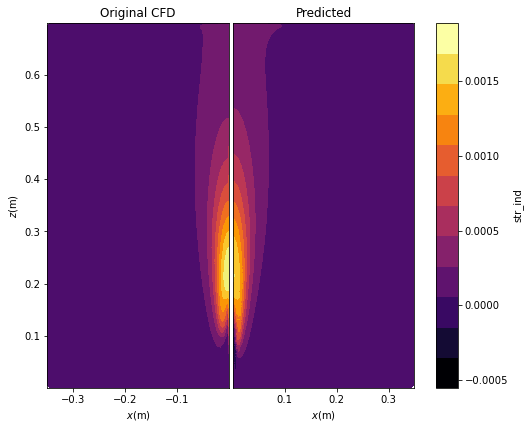

In [3]:
# Reconstruct the high-dimensional state from the POD coefficients
Xp = gpr.reconstruct(Ap)

# Select the feature to plot
str_ind = 'OH'
ind = features.index(str_ind)

x_test = X_test[ind*n_cells:(ind+1)*n_cells,3]
xp_test = Xp[ind*n_cells:(ind+1)*n_cells, 3]

plot_contours_tri(xz[:,0], xz[:,1], [x_test, xp_test], cbar_label='str_ind')

## Use a different kernel and mean

In this cell we use show how to use different mean and kernel functions.

Iter 1/1000 - Loss: 2.324 - Noise: 0.693
Iter 2/1000 - Loss: 2.150 - Noise: 0.744
Iter 3/1000 - Loss: 2.013 - Noise: 0.796
Iter 4/1000 - Loss: 1.906 - Noise: 0.845
Iter 5/1000 - Loss: 1.820 - Noise: 0.888
Iter 6/1000 - Loss: 1.752 - Noise: 0.922
Iter 7/1000 - Loss: 1.697 - Noise: 0.943
Iter 8/1000 - Loss: 1.652 - Noise: 0.952
Iter 9/1000 - Loss: 1.614 - Noise: 0.949
Iter 10/1000 - Loss: 1.583 - Noise: 0.936
Iter 11/1000 - Loss: 1.556 - Noise: 0.914
Iter 12/1000 - Loss: 1.532 - Noise: 0.886
Iter 13/1000 - Loss: 1.510 - Noise: 0.853
Iter 14/1000 - Loss: 1.488 - Noise: 0.816
Iter 15/1000 - Loss: 1.467 - Noise: 0.778
Iter 16/1000 - Loss: 1.445 - Noise: 0.737
Iter 17/1000 - Loss: 1.423 - Noise: 0.696
Iter 18/1000 - Loss: 1.402 - Noise: 0.655
Iter 19/1000 - Loss: 1.380 - Noise: 0.615
Iter 20/1000 - Loss: 1.359 - Noise: 0.575
Iter 21/1000 - Loss: 1.339 - Noise: 0.537
Iter 22/1000 - Loss: 1.319 - Noise: 0.500
Iter 23/1000 - Loss: 1.301 - Noise: 0.465
Iter 24/1000 - Loss: 1.283 - Noise: 0.431
I

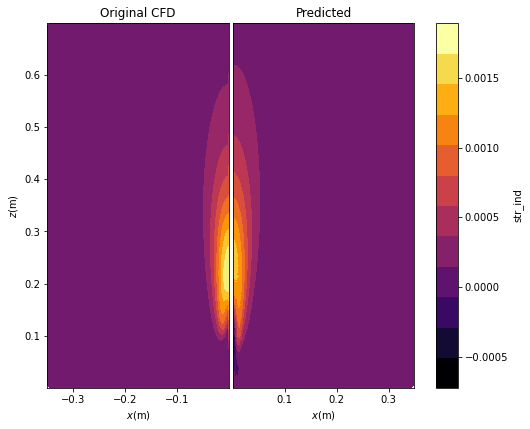

In [4]:
from gpytorch.means import LinearMean
from gpytorch.kernels import PiecewisePolynomialKernel, LinearKernel

q = Ap.shape[1]
input_size = P_test.shape[1]
mean = LinearMean(input_size, batch_shape=torch.Size([q]))
kernel = PiecewisePolynomialKernel(q=input_size, batch_shape=torch.Size([q]))
Ap, Sigmap = gpr.fit_predict(P_test, select_modes='number', n_modes=q, mean=mean, kernel=kernel, verbose=True)

# Reconstruct the high-dimensional state from the POD coefficients
Xp = gpr.reconstruct(Ap)

# Select the feature to plot
str_ind = 'OH'
ind = features.index(str_ind)

x_test = X_test[ind*n_cells:(ind+1)*n_cells,3]
xp_test = Xp[ind*n_cells:(ind+1)*n_cells, 3]

plot_contours_tri(xz[:,0], xz[:,1], [x_test, xp_test], cbar_label='str_ind')